## 주성분 분석

> 즉, PCA(principal component analysis)로 통계 데이터 분석(주성분 찾기), 데이터 압축(차원감소), 노이즈 제거 등 다양하게 활용함\
orthogonal transformation(직교변환) 사용해 상관관계 가지는 관측값 변수들의 집합을 주성분의 집합으로 바꾸는 통계적 절차\
PCA = othogonal Progection of X onto the set of uncorrelated vectors => eigendecomposition of $ X^TX $\
==========\
C: covariance matrix\
v : variance of data\
Maximize $V^TCV$\
subject to $\left \| V \right \|_2 = 1$

독일 DAX지수 사용(30가지 주식으로 구성)

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()
from sklearn.decomposition import KernelPCA
import datetime

### 11-3-1 DAX지수와 30개 구성 종목

In [2]:
symbols = ['MUV2.DE', 'DB1.DE', 'ADS.DE', 'DBK.DE', 'SAP.DE',
           'DWNI.DE', 'MTX.DE', 'BMW.DE', 'DTE.DE', 'ALV.DE',
           'BAS.DE', 'RWE.DE', 'LIN.DE', 'MRK.DE', 'DPW.DE',
           'FRE.DE', 'FME.DE', 'SIE.DE', 'VOW3.DE', 'IFX.DE',
           'HEI.DE', 'DAI.DE', 'DHER.DE', 'ENR.DE', 'EOAN.DE',
           'BAYN.DE', 'CON.DE', '^GDAXI']

In [3]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.get_data_yahoo(sym,data_source ='yahoo')['Adj Close']
data = data.dropna()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETR:ADS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETR:ALV: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETR:BAS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETR:BAYN: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETR:BEI: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETR:BMW: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETR:CBK: No data found, symbol may be delisted
[*********************100%*******

In [17]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [18]:
data[data.columns[:6]].head()

,MUV2.DE,DB1.DE,ADS.DE,DBK.DE,SAP.DE,DWNI.DE
Date,,,,,,
2020-09-29,218.100006,151.199997,281.200012,7.074,134.160004,42.410000
2020-09-30,216.600006,149.800003,276.100006,7.190,132.759995,42.689999
2020-10-01,215.600006,148.199997,278.899994,7.100,133.740005,43.230000
2020-10-02,216.199997,148.350006,276.899994,7.196,132.759995,43.680000
2020-10-05,221.899994,149.000000,273.500000,7.360,132.399994,44.060001


### 11-3-2 주성분 분석 작용

In [19]:
scale_function = lambda x : (x-x.mean())/x.std()  #정규화 보조함수 

In [20]:
pca = KernelPCA().fit(data.apply(scale_function))  #복수의 주성분을 가지는 분석 고려

In [21]:
#eigenvalue로 결정됨
len(pca.lambdas_) #너무 많음

27

In [22]:
pca.lambdas_[:10].round() #10개만 살펴보기

array([2060.,  649.,  296.,  227.,  198.,  133.,   70.,   49.,   33.,
         22.])

In [23]:
#정규화
get_we = lambda x : x/x.sum()
get_we(pca.lambdas_)[:10]

array([0.5372892 , 0.16918455, 0.07708399, 0.05908601, 0.05159931,
       0.03469151, 0.01821263, 0.01279326, 0.00862481, 0.00571494])

In [24]:
get_we(pca.lambdas_)[:5].sum()#앞의 5개의 주성분만으로 시계열 변동의 90퍼를 설명 가능

0.8942430695010125

### 11-3-3 주성분 지수 구성

In [25]:
#원래 지수와 비교
pca = KernelPCA(n_components=1).fit(data.apply(scale_function)) 
dax['PCA.1'] = pca.transform(-data) #주성분 하나만 가지는 주성분 지수 

<AxesSubplot:xlabel='Date'>

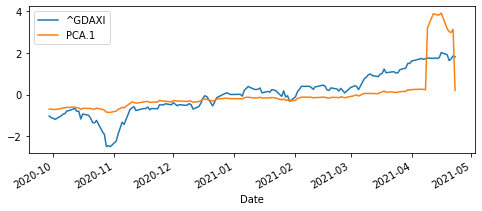

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize = (8,3))

In [27]:
#주성분 개수 증가
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA.5'] = np.dot(pca_components,weights) #주성분 하나만 가지는 주성분 지수 

<AxesSubplot:xlabel='Date'>

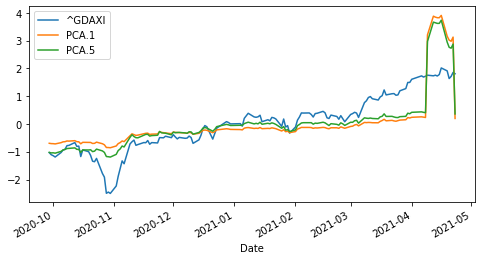

In [28]:
dax.apply(scale_function).plot(figsize = (8,4)) #썩 좋아지지는 않음

In [29]:
#날짜정보 추가
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index) #matplotlib에 호환되는 형식
mpl_dates #scatter 플롯 작성시 사용

array([18534., 18535., 18536., 18537., 18540., 18541., 18542., 18543.,
       18544., 18547., 18548., 18549., 18550., 18551., 18554., 18555.,
       18556., 18557., 18558., 18561., 18562., 18563., 18564., 18565.,
       18568., 18569., 18570., 18571., 18572., 18575., 18576., 18577.,
       18578., 18579., 18582., 18583., 18584., 18585., 18586., 18589.,
       18590., 18591., 18592., 18593., 18596., 18597., 18598., 18599.,
       18600., 18603., 18604., 18605., 18606., 18607., 18610., 18611.,
       18612., 18613., 18614., 18617., 18618., 18619., 18624., 18625.,
       18626., 18631., 18632., 18633., 18634., 18635., 18638., 18639.,
       18640., 18641., 18642., 18645., 18646., 18647., 18648., 18649.,
       18652., 18653., 18654., 18655., 18656., 18659., 18660., 18661.,
       18662., 18663., 18666., 18667., 18668., 18669., 18670., 18673.,
       18674., 18675., 18676., 18677., 18680., 18681., 18682., 18683.,
       18684., 18687., 18688., 18689., 18690., 18691., 18694., 18695.,
      

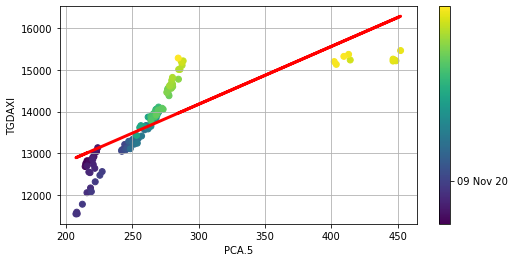

In [30]:
plt.figure(figsize = (8,4))
plt.scatter(dax['PCA.5'],dax['^GDAXI'],c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA.5'],
                               dax['^GDAXI'],1),
                    dax['PCA.5'])
plt.plot(dax['PCA.5'],lin_reg,'r',lw=3)
plt.grid(True)
plt.xlabel('PCA.5')
plt.ylabel('TGDAXI')
plt.colorbar(ticks = mpl.dates.DayLocator(interval = 250),
            format = mpl.dates.DateFormatter('%d %b %y')) #왜 날짜 하나만 나오지??????????????????

In [31]:
#시간 구간 두개로 나누기
cut_date = '2021-04-09'
early_pca = dax[dax.index < cut_date]['PCA.5']
early_reg = np.polyval(np.polyfit(early_pca,
                                 dax['^GDAXI'][dax.index < cut_date],1),
                      early_pca)

In [32]:
late_pca = dax[dax.index >= cut_date]['PCA.5']
late_reg = np.polyval(np.polyfit(late_pca,
                                dax['^GDAXI'][dax.index >= cut_date],1),
                     late_pca)

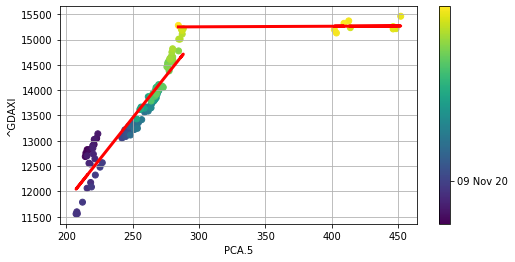

In [33]:
plt.figure(figsize = (8,4))
plt.scatter(dax['PCA.5'],dax['^GDAXI'],c = mpl_dates)
plt.plot(early_pca,early_reg,'r',lw = 3)
plt.plot(late_pca,late_reg,'r',lw = 3)
plt.grid(True)
plt.xlabel('PCA.5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks =mpl.dates.DayLocator(interval=250),
            format = mpl.dates.DateFormatter('%d %b %y'))
